In [1]:
from model_complex import Calibration
import matplotlib.pyplot as plt


d = Calibration('age-group', [100, 100])

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
epid, data = d.calibrate('spb', './', '7-01-2018', '6-20-2019')

Initializing SMC sampler...
Sampling 6 chains in 6 jobs


Output()

ValueError: Input dimension mismatch: (input[%i].shape[%i] = %lld, input[%i].shape[%i] = %lld)
Apply node that caused the error: Composite{sqr((0.1 * (i0 - i1)))}(sim{[[    0. ... .   321.]]}, Simulator_sim_rv{"(),(),(),(),(),()->()"}.out)
Toposort index: 25
Inputs types: [TensorType(float64, shape=(2, 52)), TensorType(float64, shape=(2, 52))]
Inputs shapes: [(2, 52), (2, 2)]
Inputs strides: [(416, 8), (16, 8)]
Inputs values: ['not shown', array([[100.        ,   6.52875287],
       [100.        ,   2.5770166 ]])]
Outputs clients: [[Sum{axes=None}(Composite{sqr((0.1 * (i0 - i1)))}.0)]]

HINT: Re-running with most PyTensor optimizations disabled could provide a back-trace showing when this node was created. This can be done by setting the PyTensor flag 'optimizer=fast_compile'. If that does not work, PyTensor optimizations can be disabled with 'optimizer=None'.
HINT: Use the PyTensor flag `exception_verbosity=high` for a debug print-out and storage map footprint of this Apply node.

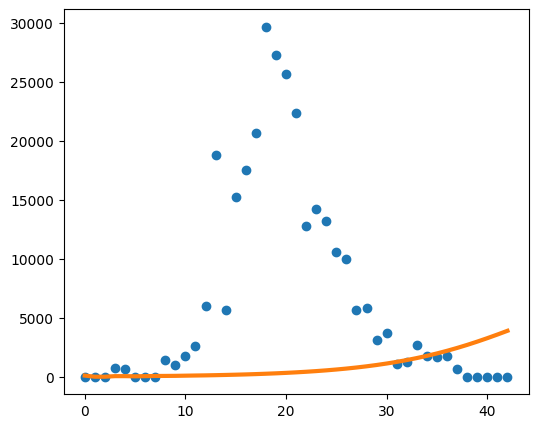

In [4]:

fig, ax = plt.subplots(1, 1, figsize=(6, 5))
start_day = 15    
posterior = epid.posterior.stack(samples=("draw", "chain"))
ax.plot(list(data), "o")
ax.plot(simulation_func(None, posterior["alpha"].mean(), posterior["beta"].mean()), 
                linewidth=3)


In [3]:
from model_complex import FactoryBRModel

BRModel = FactoryBRModel.get_model('age-group')

Exception: model: ag-group does not exist

In [2]:
BRModel.simulate([1,1], [1,1])

TypeError: AgeGroupBRModel.simulate() missing 4 required positional arguments: 'alpha', 'beta', 'initial_infectious', and 'rho'